In [ ]:
Your name:

points: 50

due by Nov. 7 midnight

## HW3:  k nearest neighbors:
  
The heart dataset (given) contains 303 patients  heart-disease diagnoses. Here are the first 5 patients data:

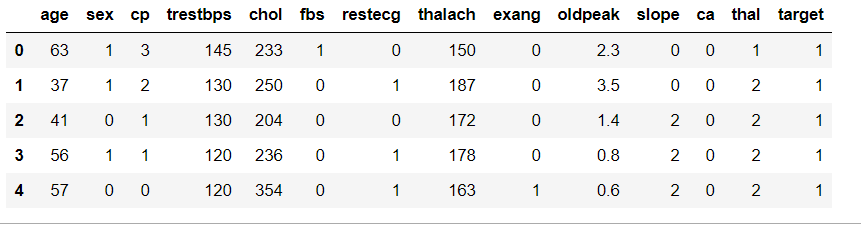

 - Columns 1-13 are some lab results.

 - The last column 'target' shows 1 for 'positive' or 0 for 'negative' 

 - data in a numpy array (code is given)  
 
 
In this homework, we need to use numpy to work on the k nearest neighbors (kNNs) algorithm.  


 ---- 

## Step 1. For one patient (use patient ID)
   
    
         - ask user to input a patient's id  (int : 0-302),

         - write a function to calculate the Euclidean distance (from this patient to all others)  

           **See the formula below, target col should be exclusive**
    
   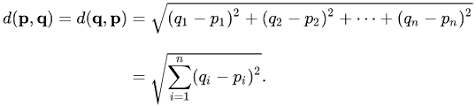
    
          where n is the number of test parameters (n=13).

         - find top 5 (k = 5)  most similar patients based on the shortest distances, and track their diagnoses,

         - use majority vote to predict this patient's diagnosis and compare it with this patient's actual diagnosis:
                 
                   1. if they match, there is no error
                   2. if they do not match, there is an error
         - print out both diagnoses.
         
 

In [11]:
# libraries needed
import pandas as pd 
import numpy as np

# load in the heart disease data into dataframe
data = pd.read_csv("heart.csv")
display(data.head() )

# use numpy array 
heart = np.asarray(data)
heart.shape

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


(303, 14)

# Your code start here 

In [19]:
# (5 points) scaling the data to the range [0, 1]: normalization
# (x - x_min)/(x_max - x_min )


heart = (heart - heart.min(axis=0))/(heart.max(axis=0) - heart.min(axis=0))

heart.min(axis = 0) 

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [20]:
# distance: x
# (5 points) distance or similarity (the closer the more similar)

def dist(p, q):
    
        dist =  (sum((p-q)**2))**0.5
        
        # or use the function
        # dist = np.linalg.norm(p-q)
        
        return dist
 

In [21]:
# (10 points) define a kNN functin with a given k and pid, return the majority vote
def kNN(pid, k):

    # (1) use comprehension list to find all distances
    distance  = [ dist(heart[pid][0:-1], heart[i][0:-1]) for i in range(len(heart))]
    distances = np.array(distance)

    # (2) looking for k closest neighbors by similarity with sorted distances first (low to high), return indices
    ind  = np.argsort(distances)                                   #  indices of the sorted array
    short_dis=distances[ind]

    # then track target col: find the k closest patient's diagnoises    
    sum_positive = sum(heart[ind, -1][1:k+1])           # -1 col for the target col # skip the first distance, patient himself
                                                                  
    # (3) majority vote 
    if sum_positive >= k/2:                                                
        predict = 1
    else:
        predict = 0
        
    return predict
    

In [22]:
# (10 points) Test the kNN() function


# (A) for any given patient id and a k value
pid = int( input(" What is the patient's ID: ")  )    
k = 5

# (B) predition for this pid and a k value
pred = kNN(pid, k )
if pred == 1:                                                
    print(f" Majority vote from {k} nearest neighbors:  Positive")
else:
    print(f"Majority vote from {k} nearest neighbors:  Negative")


# (C) the real diagosis:
actual = heart[pid, -1]
if actual == 1:
    print(" Actually this patient is tested:     Positive.")
else:
    print(" Actually this patient is tested:     Negative.")
  


 What is the patient's ID: 200
 Majority vote from 5 nearest neighbors:  Positive
 Actually this patient is tested:     Negative.


### sample run 1
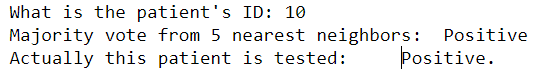

### sample run 2
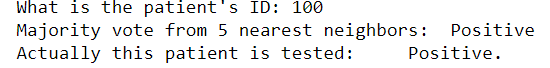

## sample run 3
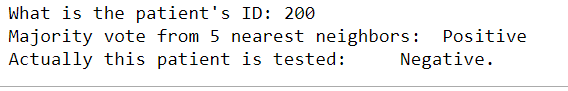

##  Step 2: Run over all patients and check the overall accuracy for k = 5
 
    Based on what you have in step 1, you need to run a loop to check every patient's prediction vs actual diagnosis. 
    Then find the accuracy (total number of correct predictions/total cases)


In [23]:
# (10 points) for any given k, for example k = 10,
# loop over all patients then find the accuracy

def accuracy(k_nn):
    total_correct = 0
    
    for pid in range(len(heart)):
        pred = kNN(pid, k=k_nn)
        actual = heart[pid, -1]

        if actual == pred:
            total_correct += 1

    # accuracy
    result = total_correct/len(heart)
    return result 


k_nn = 5
acc = accuracy(k_nn)
print(f'k: {k_nn}   accuracy: {acc}')

k: 5   accuracy: 0.8283828382838284


## Step 3: Find the best k.
    
    For different K, this accuracy might not be the same. Find the best K which corresponds the highest accuracy.


In [24]:
# (5 points) loop for different k: from 1 to 50 (this loop will take 3-5 minutes)
# find the best k which corresponds the highest accuracy
acc_knn = []

for i in range(1, 51):
    acc = accuracy(i)
    acc_knn.append(acc)
    
# Best K is:
best = 1 + np.argmax(acc_knn) # as index itself start 0, we need to add 1 to the argmax
print("Best k:", best, " The max. accuracy", max(acc_knn))

Best k: 5  The max. accuracy 0.8283828382838284


In [27]:
for i, x in enumerate(acc_knn):
    print(f'{i+1}, {x:.4f}')

1, 0.7558
2, 0.7657
3, 0.8086
4, 0.7987
5, 0.8284
6, 0.8152
7, 0.8284
8, 0.8086
9, 0.8284
10, 0.7888
11, 0.8053
12, 0.7822
13, 0.7954
14, 0.7789
15, 0.7888
16, 0.7921
17, 0.7855
18, 0.7723
19, 0.7756
20, 0.7822
21, 0.7756
22, 0.7855
23, 0.7822
24, 0.7921
25, 0.7888
26, 0.7888
27, 0.8020
28, 0.7954
29, 0.8020
30, 0.7921
31, 0.7987
32, 0.7888
33, 0.7888
34, 0.7855
35, 0.7954
36, 0.7921
37, 0.7987
38, 0.7855
39, 0.7921
40, 0.7855
41, 0.7822
42, 0.7789
43, 0.7789
44, 0.7756
45, 0.7789
46, 0.7789
47, 0.7789
48, 0.7789
49, 0.7789
50, 0.7822


### plotting (optional for you)

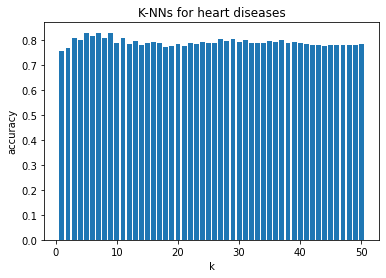

In [28]:
# (0 points) plotting 
import matplotlib.pyplot as plt
plt.bar(range(1, 51), acc_knn)
plt.xlabel(" k ")
plt.ylabel("accuracy")
plt.title("K-NNs for heart diseases")
plt.show()

### (5 points) comparison: with/without data scaling:

    - rerun your code if you skipped the step of data scaling in the beginning. 
    - what are the differences?
    
###### observations with/without normalization
  
   - without normalization:
      - the best k is 31,  
      - The max. accuracy 0.6963696369636964
   - The normalization is helpful for higher accuracy.  
   
   - This dataset is relatively small, we do not see the acc ~ k trend very obviously. 
   
    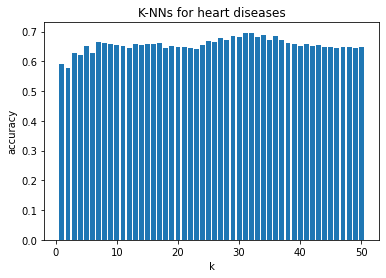

In [ ]:
# end 